In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('jet')

In [2]:
data_dir = '/data3/Astro/lstm_rom/e2c_larry/data/9w_bhp_rate_fix_wl/'

In [3]:
hf_r = h5py.File(data_dir + 'state_seq_pred_ctrl.mat', 'r')
state_true = np.array(hf_r.get('true'))
state_pred = np.array(hf_r.get('pred'))
ctrl = np.array(np.array(hf_r.get('ctrl')))
hf_r.close()

In [4]:
ctrl.shape

(4, 9)

In [5]:
ctrl

array([[0.07499736, 0.04368299, 0.04059443, 0.14467765, 0.15424382,
        0.79189968, 0.52961014, 0.01121817, 0.4100861 ],
       [0.07557938, 0.16471489, 0.15394409, 0.12946009, 0.01912381,
        0.36417825, 0.51497164, 0.95240841, 0.81429757],
       [0.14150949, 0.12160103, 0.02676519, 0.15325215, 0.14775444,
        0.16857709, 0.28836255, 0.51830817, 0.59415862],
       [0.06413354, 0.12722605, 0.0485302 , 0.08457916, 0.05625223,
        0.25221815, 0.73470535, 0.97206453, 0.62299486]])

In [6]:
state_true.shape

(4, 10, 3600, 2)

In [7]:
state_pred.shape

(4, 10, 60, 60, 2)

In [8]:
well_loc_file = '/data/cees/zjin/lstm_rom/sim_runs/case4_9w_bhp_rate/template/well_loc00.dat'

In [9]:
well_loc = np.loadtxt(well_loc_file).astype(int)

In [10]:
num_prod = well_loc[0,0]
num_inj = well_loc[0,1]
print(num_inj, num_prod)

4 5


In [11]:
prod_loc = well_loc[1:num_prod+1,:]
prod_loc

array([[10, 10],
       [ 8, 52],
       [30, 30],
       [50, 10],
       [50, 50]])

In [12]:
inj_loc = well_loc[num_prod+1:,:]
inj_loc

array([[ 7, 23],
       [35, 10],
       [18, 40],
       [50, 36]])

## Plot producer pressure

In [13]:
num_case = state_true.shape[0]
num_step = state_true.shape[1]

In [14]:
prod_loc.shape

(5, 2)

In [15]:
state_true[0, :, :,0].reshape((num_step, 60, 60))[:, prod_loc[0,1], prod_loc[0,0]].shape

(10,)

In [16]:
p_max = 370*14.5038
p_min = 280*14.5038

p_diff = p_max - p_min
p_mid = 0.45*p_diff + p_min



In [17]:
state_pred[:, :, :, :, 1] = state_pred[:, :, :, :, 1] * p_diff + p_min
state_true[:, :, :, 1] = state_true[:, :, :, 1] * p_diff + p_min

In [18]:
print(p_mid)

4648.4679


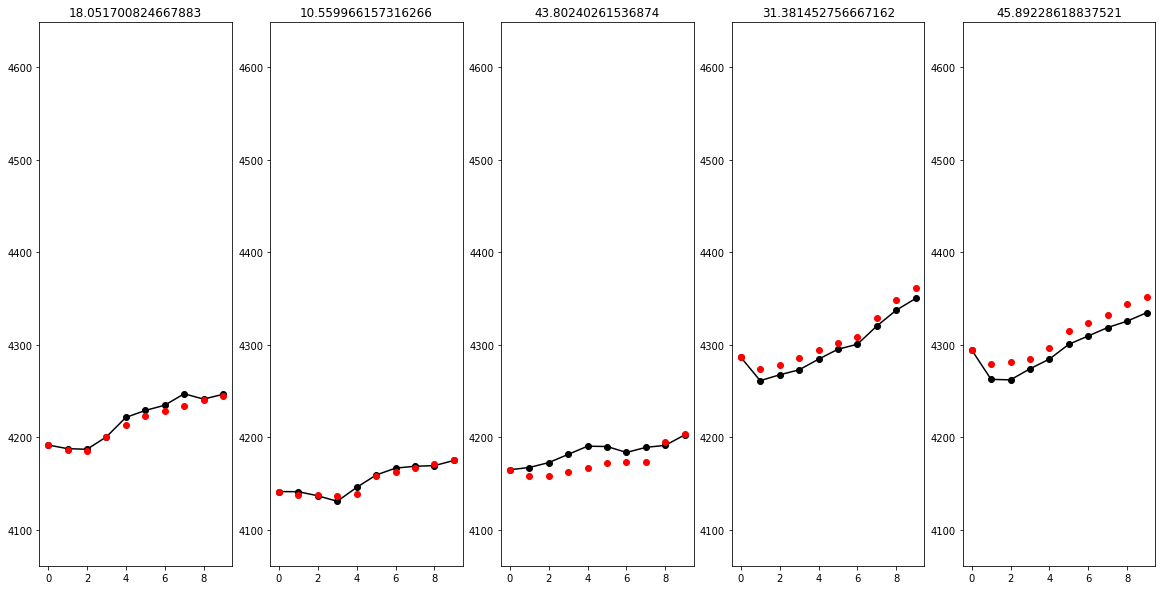

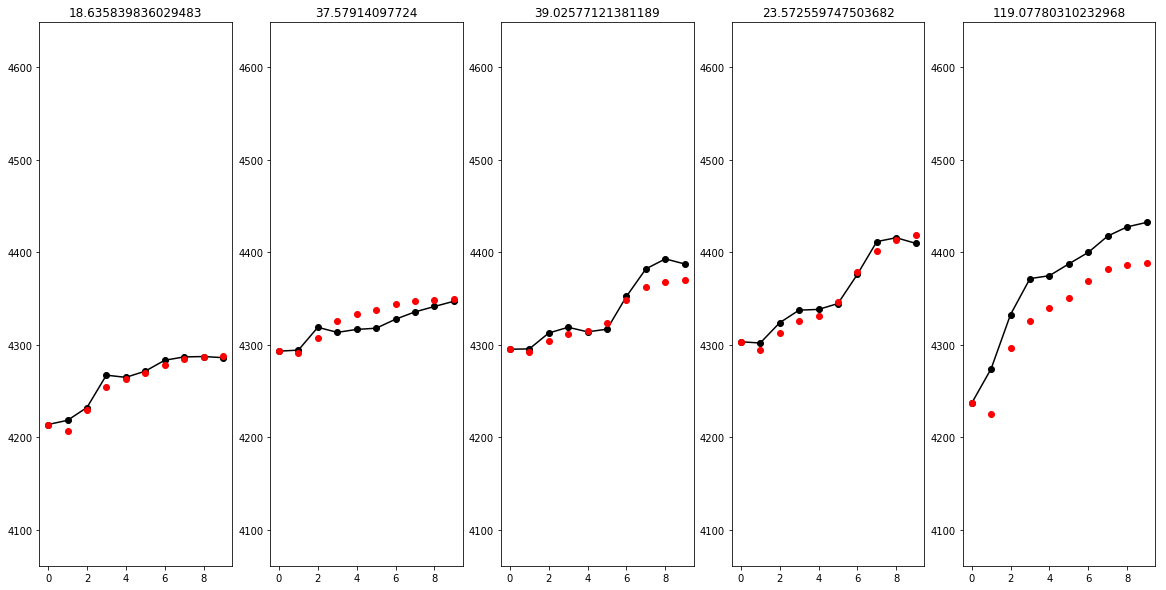

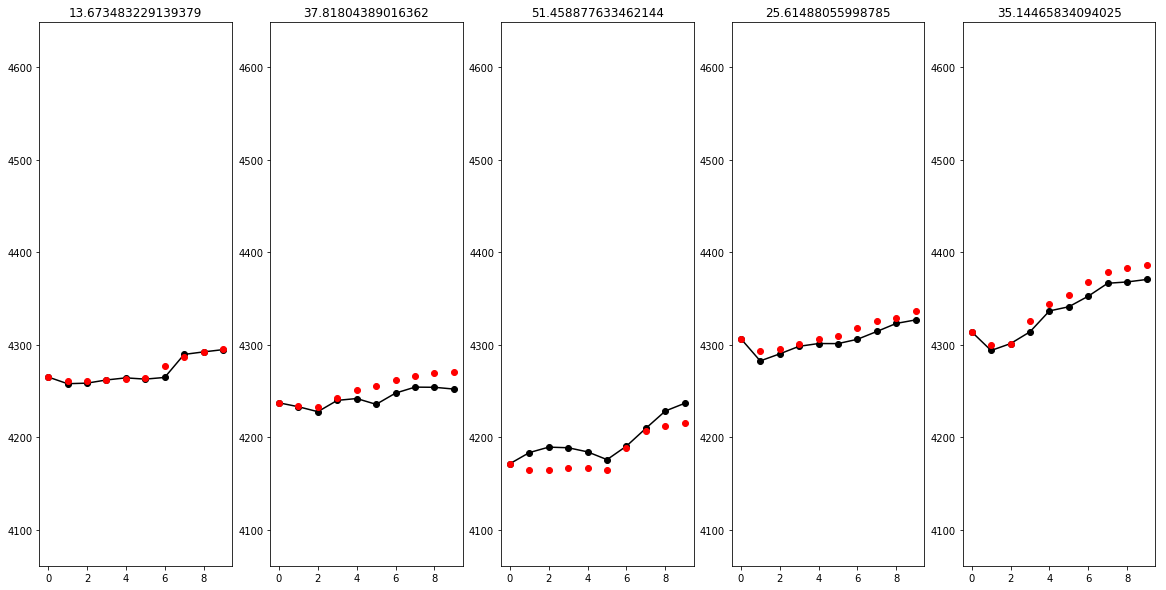

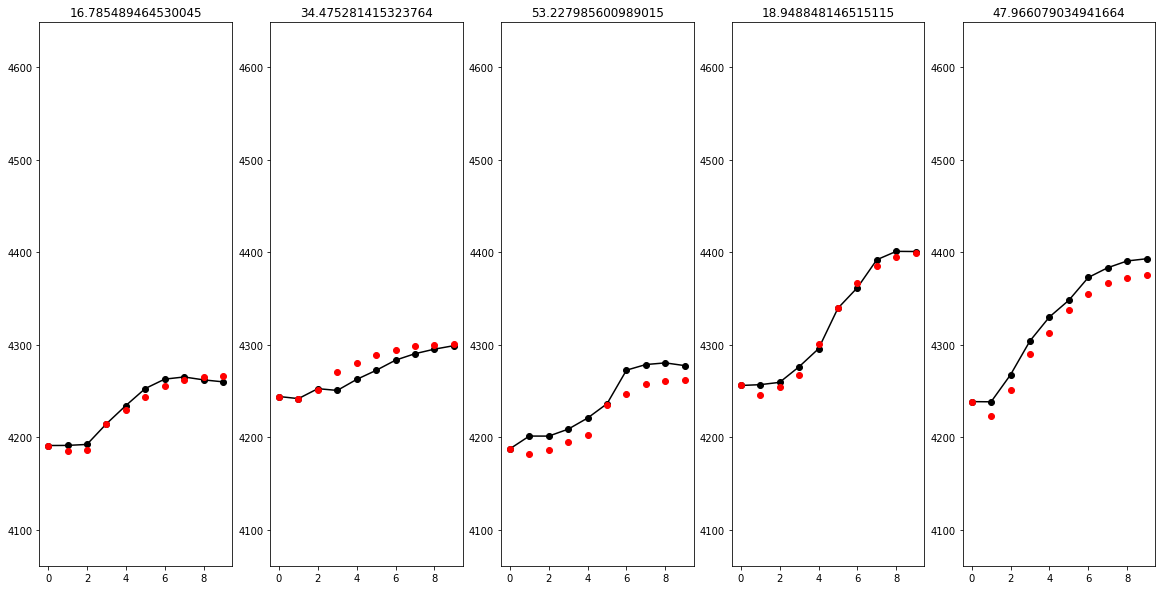

In [19]:
for k in range(num_case):
    plt.figure(k, figsize=(20,10))
    for i in range(num_prod):
        plt.subplot(1, num_prod, i+1)
        pres_true = state_true[k, :, :,1].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        pres_pred = state_pred[k, :, :, :,1].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]

        plt.plot(pres_pred,'ko-')
        plt.plot(pres_true,'ro')
        plt.ylim([p_min, p_mid])
        plt.title(np.linalg.norm(pres_pred - pres_true))
plt.show()
        

In [20]:
prod_loc

array([[10, 10],
       [ 8, 52],
       [30, 30],
       [50, 10],
       [50, 50]])

In [21]:
state_true[k, :, :,0].shape

(10, 3600)

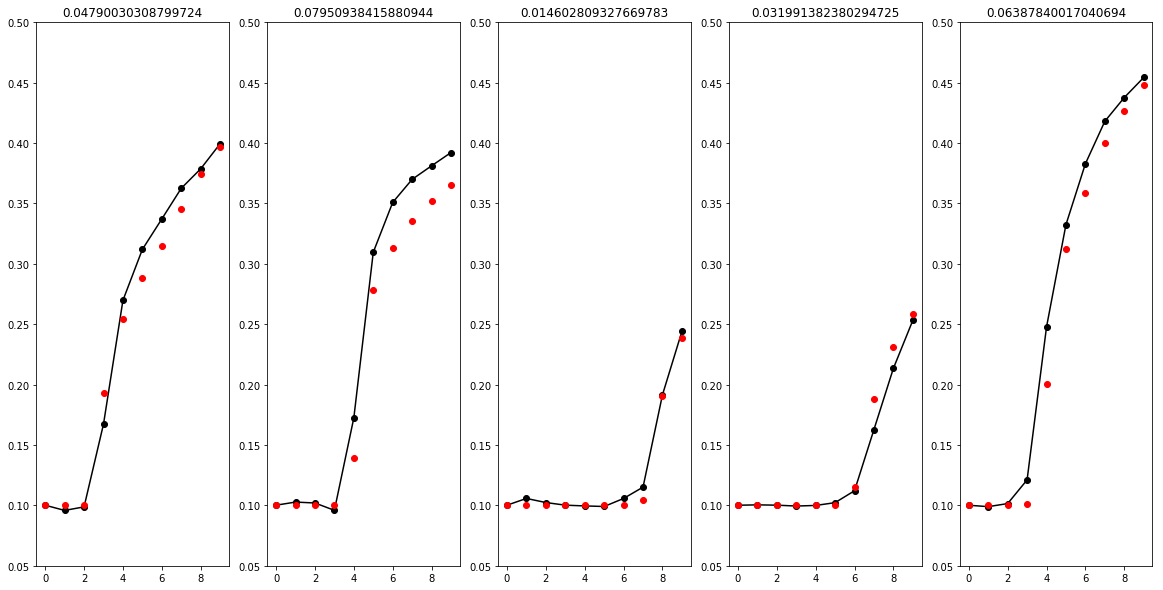

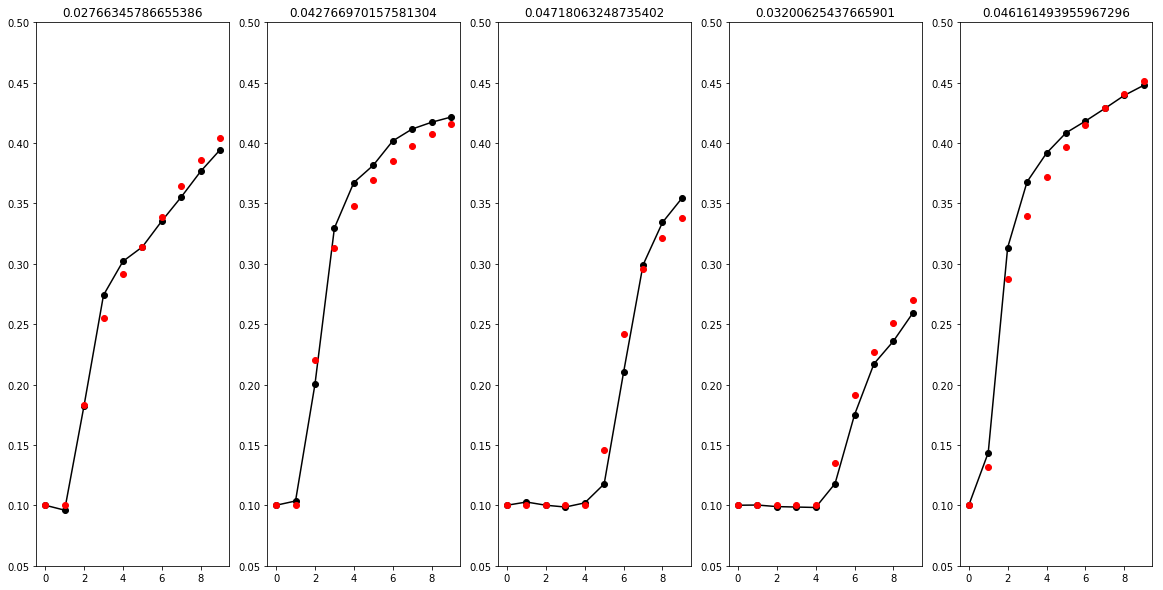

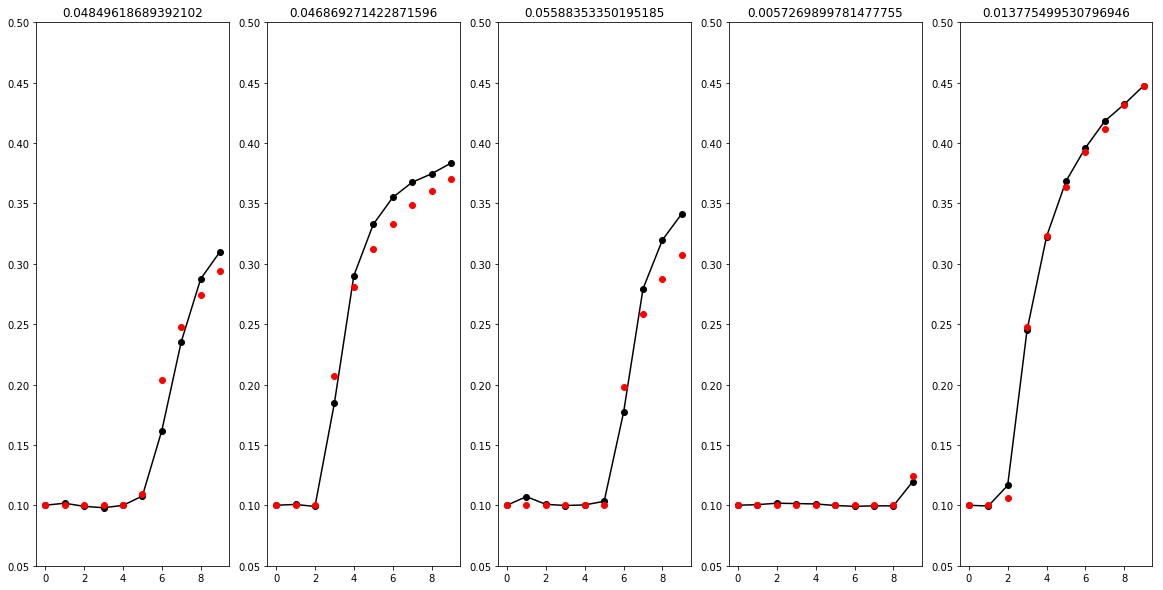

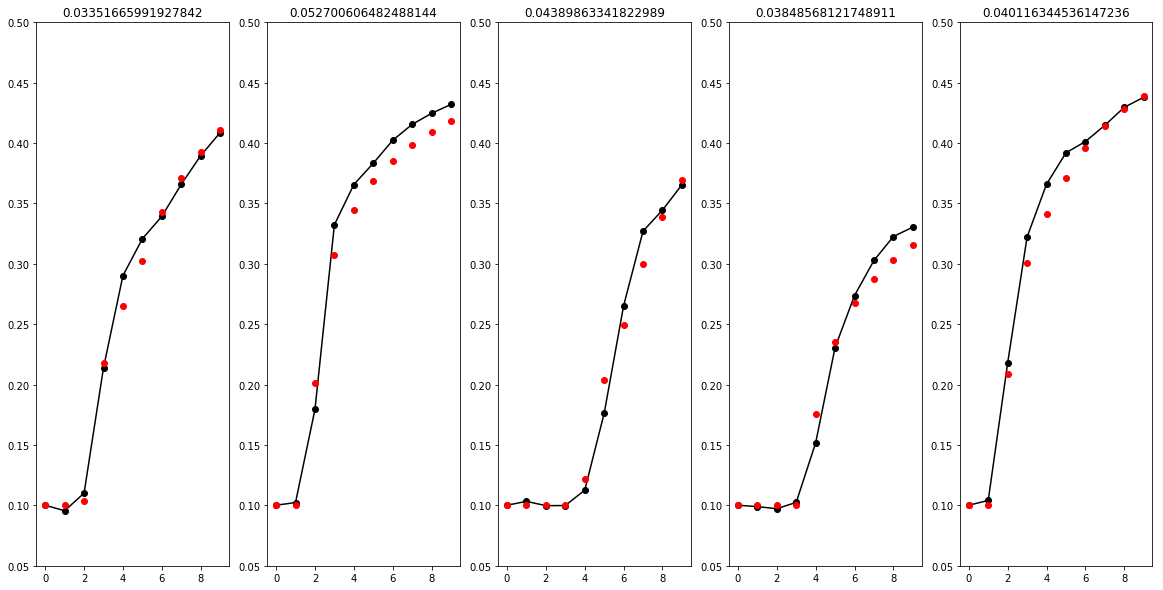

In [22]:
for k in range(num_case):
    im = plt.figure(k, figsize=(20,10))
    for i in range(num_prod):
        plt.subplot(1, num_prod, i+1)
#         print(prod_loc[i,1], prod_loc[i,0])
        sat_true = state_true[k, :, :,0].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        sat_pred = state_pred[k, :, :, :,0].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        
        plt.plot(sat_pred,'ko-')
        plt.plot(sat_true,'ro')
        plt.ylim([0.05, 0.5])
        plt.title(np.linalg.norm(sat_true - sat_pred))
plt.show()
        

In [23]:
print(state_true.shape)
print(state_pred.shape)

(4, 10, 3600, 2)
(4, 10, 60, 60, 2)


## Plot injector saturation

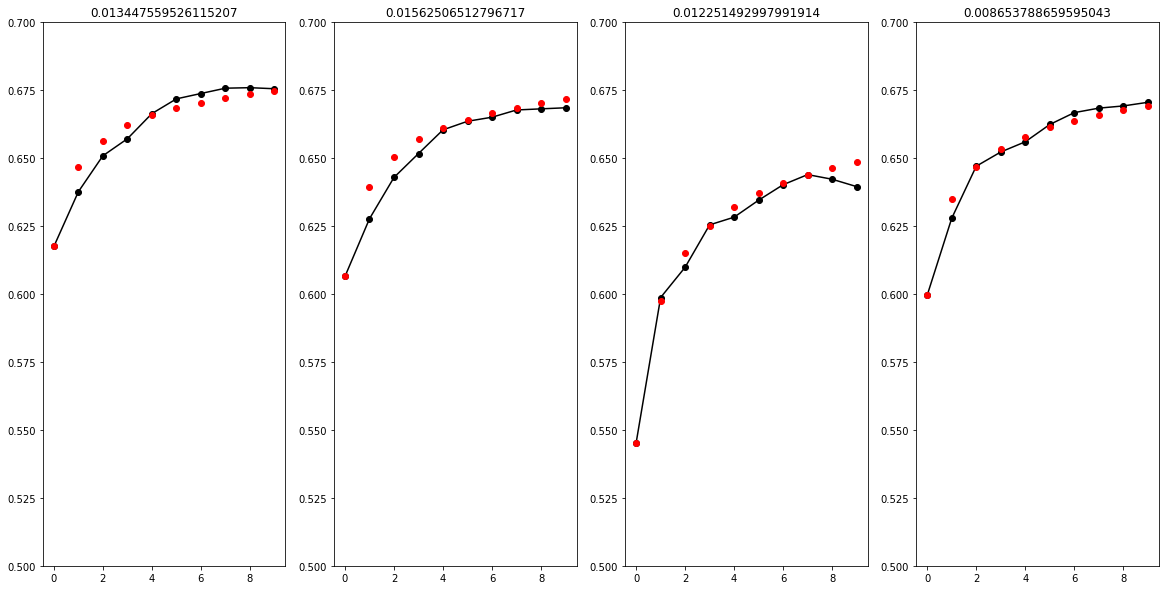

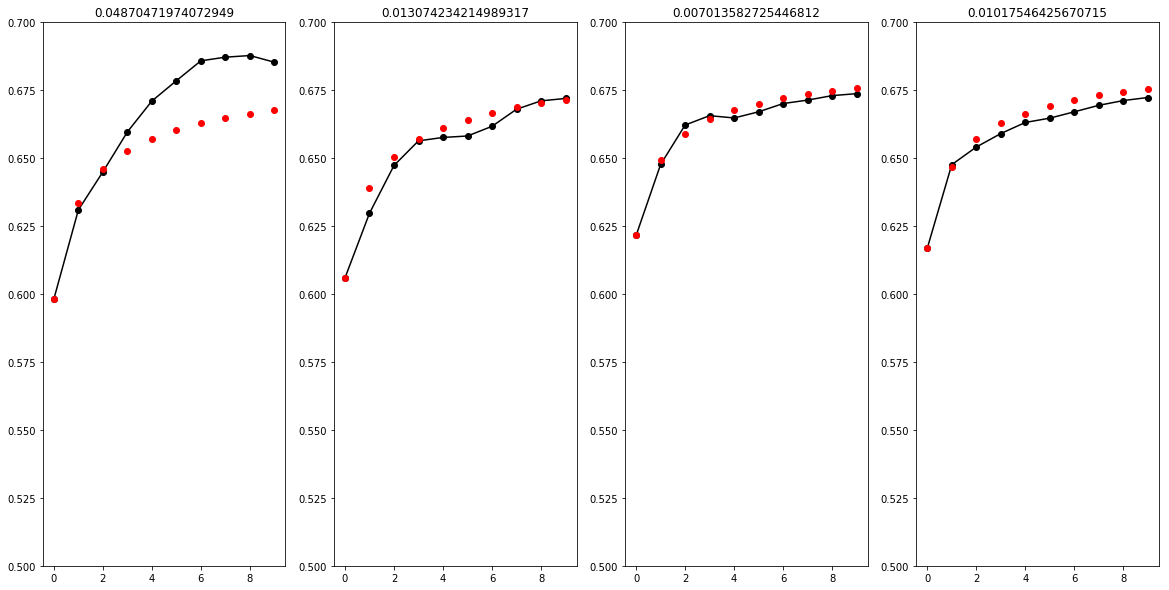

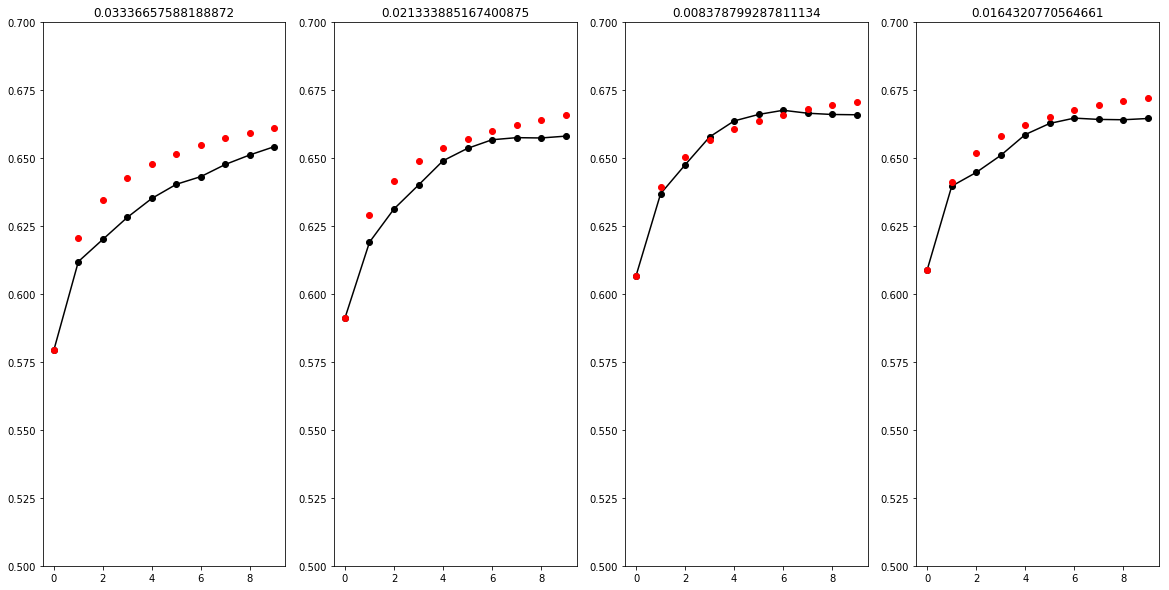

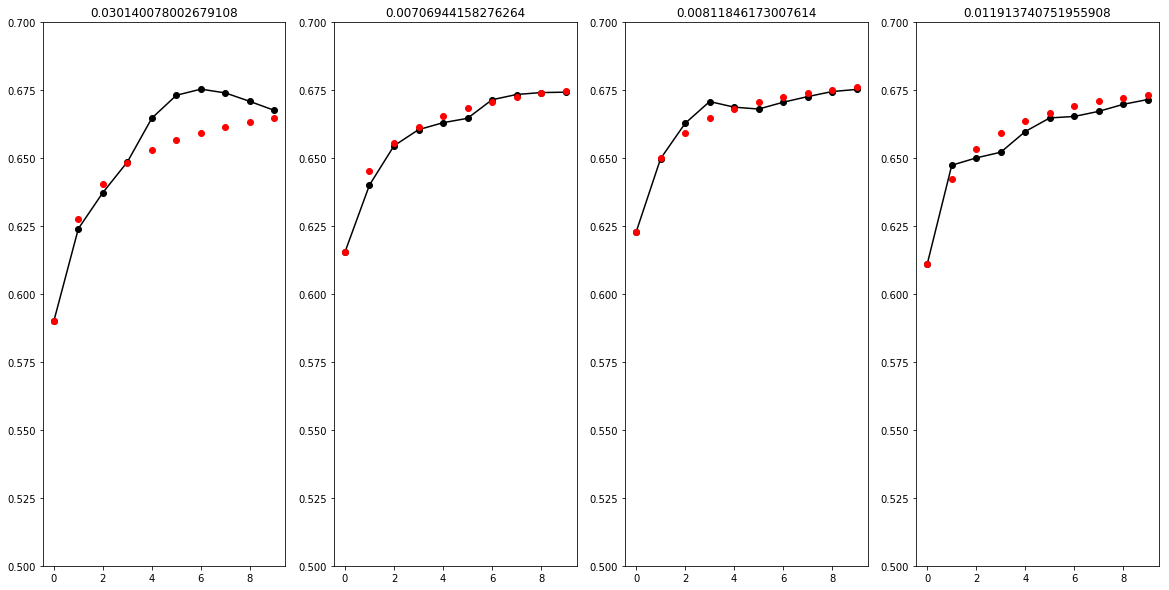

In [24]:
for k in range(num_case):
    im = plt.figure(k, figsize=(20,10))
    for i in range(num_inj):
        plt.subplot(1, num_inj, i+1)
        sat_true = state_true[k, :, :,0].reshape((num_step, 60, 60))[:, inj_loc[i,1], inj_loc[i, 0]]
        sat_pred = state_pred[k, :, :, :,0].reshape((num_step, 60, 60))[:, inj_loc[i,1], inj_loc[i, 0]]
        
        plt.plot(sat_pred,'ko-')
        plt.plot(sat_true,'ro')
        plt.ylim([0.5, 0.7])
        plt.title(np.linalg.norm(sat_true - sat_pred))
plt.show()
        

## Plot Production Rates

In [25]:
import sys
sys.path.append('/data3/Astro/global/python/')
from cal_well_data import cal_prod_rate, cal_inj_bhp

In [26]:
logk_file = '/data/cees/zjin/lstm_rom/sim_runs/case4_9w_bhp_rate/template/logk1.dat'
logk = np.loadtxt(logk_file)
# logk = logk.reshape((60,60)).T

In [27]:
# this shold be correct
# i: index on x-axis
# j: index on y-axis
def get_logk(logk, i, j):
    nx = 60
    ny = 60
    return logk[j*nx + i]

In [28]:
ctrl.shape

(4, 9)

In [29]:
p_max = 370*14.5038
p_min = 280*14.5038
p_diff = p_max - p_min

q_max = 90000
q_min = 10000
q_diff = q_max - q_min

Evaluation Case 1


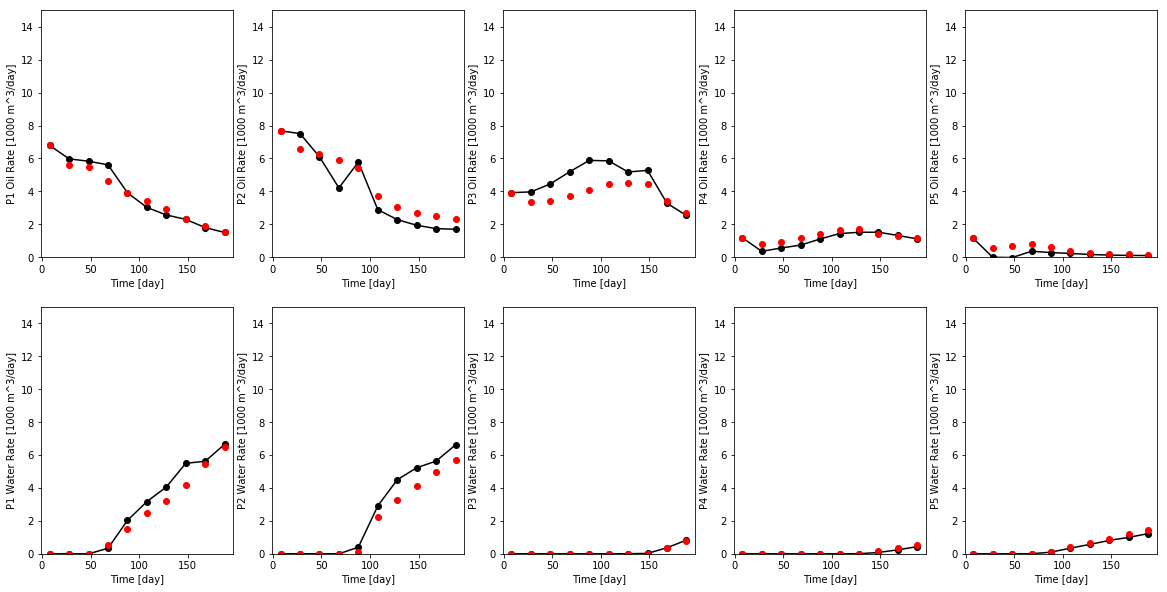

Evaluation Case 2


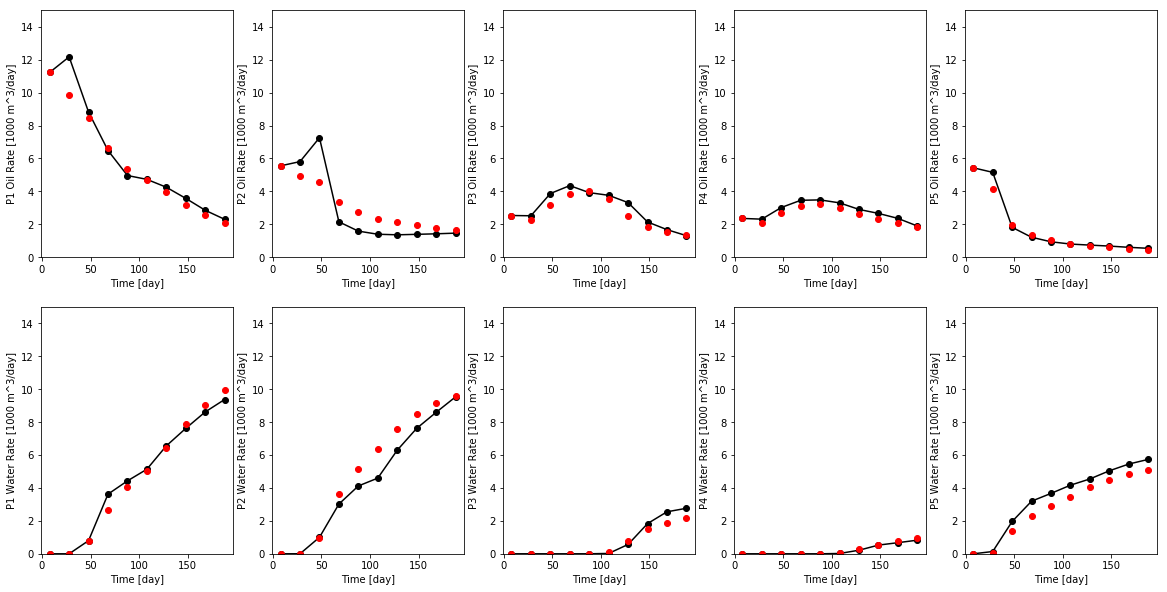

Evaluation Case 3


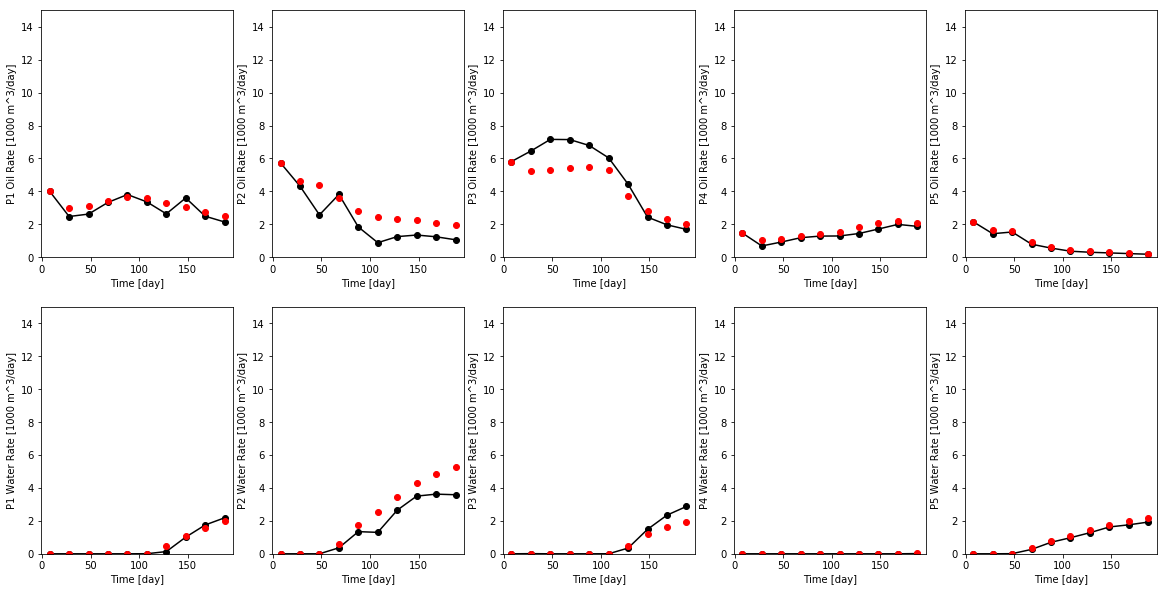

Evaluation Case 4


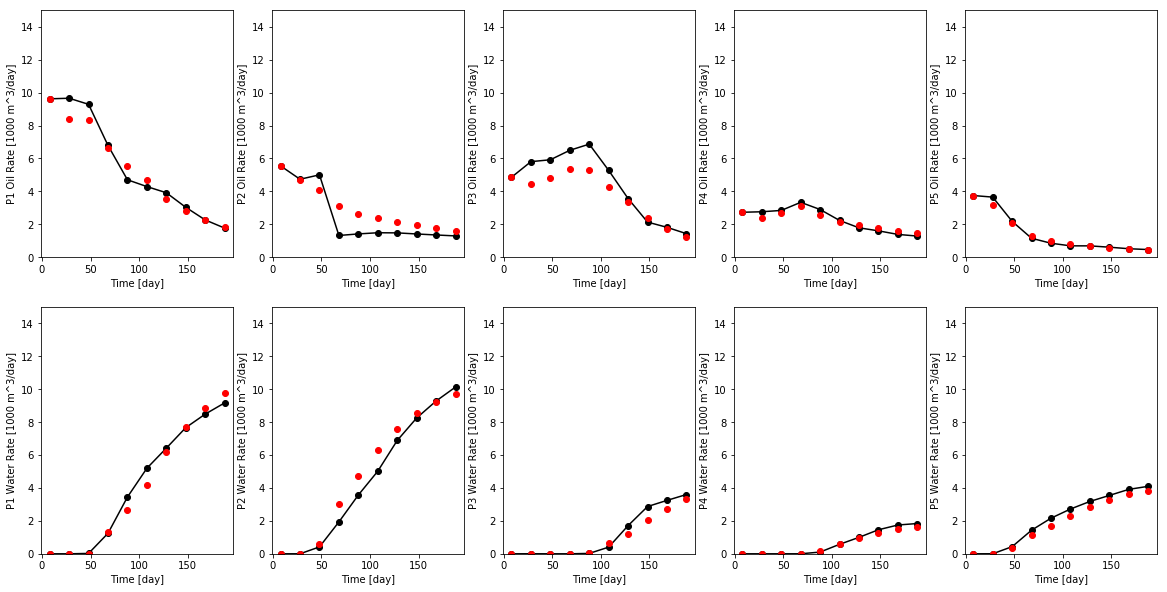

In [43]:
for k in range(num_case):
    print('Evaluation Case %d' % (k+1))
    plt.figure(k, figsize=(20,10))
    for i in range(num_prod):
        prodx = prod_loc[i, 0]
        prody = prod_loc[i, 1]
        perm = np.exp(get_logk(logk, prodx, prody))
        sat_true = state_true[k, :, :,0].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        sat_pred = state_pred[k, :, :, :,0].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        
        pres_true = state_true[k, :, :,1].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        pres_pred = state_pred[k, :, :, :,1].reshape((num_step, 60, 60))[:, prod_loc[i,1], prod_loc[i, 0]]
        
        bhp = ctrl[k, i] * p_diff + p_min
        
        wrat_true, orat_true = cal_prod_rate(pres_true, sat_true, bhp, perm)
        wrat_pred, orat_pred = cal_prod_rate(pres_pred, sat_pred, bhp, perm)
        
        bbl2m3 = 6.2898 * 1000
        
        t_steps = list(np.arange(4,104,10) * 2)
        
        
        plt.subplot(2, num_prod, i+1)
        plt.plot(t_steps, orat_pred/bbl2m3, 'ko-')
        plt.plot(t_steps, orat_true/bbl2m3, 'ro')
        plt.ylim([0, 15])
        plt.xlabel('Time [day]')
        plt.ylabel('P%d Oil Rate [1000 m^3/day]' % (i+1))
        
        plt.subplot(2, num_prod, i+num_prod+1)
        plt.plot(t_steps, wrat_pred/bbl2m3, 'ko-')
        plt.plot(t_steps, wrat_true/bbl2m3, 'ro')
        plt.ylim([0, 15])
        plt.xlabel('Time [day]')
        plt.ylabel('P%d Water Rate [1000 m^3/day]' % (i+1))
    plt.show()
        
        

In [127]:
for k in range(1):
    for i in range(num_inj):
        injx = inj_loc[i, 0]
        injy = inj_loc[i, 1]
        print(injx, injy, get_logk(logk, injx, injy))

7 23 9.318
35 10 9.141
18 40 8.873
50 36 9.262
